# **Hierarchical Reasoning Model (HRM) Tutorial** 🤖
This notebook provides a quick start guide for running the HRM in Google Colab. It is adapted from the original [GitHub repository](https://github.com/sapientinc/HRM).

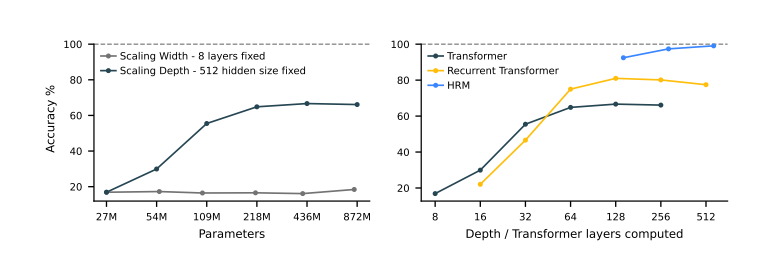

## Prerequisites 📃
Install PyTorch and other build tools

In [ ]:
# Install system dependencies
!apt-get install -y ninja-build

# Install PyTorch (latest CUDA-supported version for Colab GPUs)
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

# Install build tools
!pip3 install packaging wheel setuptools setuptools-scm

Install FlashAttention — For Hooper GPU Architecture, install FlashAttention3 below:

In [ ]:
!git clone https://github.com/Dao-AILab/flash-attention.git
%cd flash-attention/hopper
!python setup.py install
%cd /content/hrm

For Ampere or older GPU architectures, install FlashAttention2 using the code below:

In [ ]:
# Install FlashAttention (Colab GPUs are usually Ampere -> use FlashAttention 2)
!pip3 install flash-attn --no-build-isolation

The Free Colab GPU (T4) does not support FlashAttention since it's too old (Tesla architecture). FlashAttention is required for HRMs.

Clone the Official HRM Repository:

In [ ]:
# Clone HRM repository
!git clone https://github.com/sapientinc/HRM.git hrm
%cd hrm

Install all necessary dependencies below:



In [ ]:
!pip install adam-atan2 einops tqdm coolname pydantic argdantic wandb omegaconf hydra-core huggingface_hub

Optionally, set up Weights & Biases for experiment tracking and visualizing metrics.

In [ ]:
import os
os.environ["WANDB_SILENT"] = "true"
!pip install wandb
!wandb login  # Paste your API key here if you want to track experiments

Either way, make Weights & Biases silent for colab since it can't take user input.

In [ ]:
import os
os.environ["WANDB_MODE"] = "disabled"

## Let's Get Started With Testing!
First, a Sudoku solver HRM Mini-Example (15-20 minute training time)

In [ ]:
# Build a tiny dataset (100 puzzles, each augmented 100× = 10k samples)
!python dataset/build_sudoku_dataset.py \
  --output-dir data/sudoku-tiny-100-aug-100 \
  --subsample-size 100 --num-aug 100

# Train for ~1000 epochs (with mixed precision if supported)
!OMP_NUM_THREADS=8 python pretrain.py \
  data_path=data/sudoku-tiny-100-aug-100 \
  epochs=1000 eval_interval=200 \
  global_batch_size=128 lr=2e-4 puzzle_emb_lr=2e-4 \
  weight_decay=0.5 puzzle_emb_weight_decay=0.5 \
  +train.mixed_precision=amp

Evaluate the model using this code:

In [ ]:
!OMP_NUM_THREADS=8 python evaluate.py checkpoint=checkpoints/latest.pt

If you want a longer example, this training from the GitHub repo takes around ~10h on RTX 4070 Laptop GPU.

In [ ]:
# Build Sudoku Dataset
!python dataset/build_sudoku_dataset.py \
    --output-dir data/sudoku-extreme-1k-aug-1000 \
    --subsample-size 1000 --num-aug 1000

# Train HRM on Sudoku Extreme (demo)
!OMP_NUM_THREADS=8 python pretrain.py \
    data_path=data/sudoku-extreme-1k-aug-1000 \
    epochs=20000 eval_interval=2000 \
    global_batch_size=384 lr=7e-5 puzzle_emb_lr=7e-5 \
    weight_decay=1.0 puzzle_emb_weight_decay=1.0

# Training time: ~10h on RTX 4070 laptop GPU, ~15–20h on Colab A100.

# Evaluate trained model
!OMP_NUM_THREADS=8 python evaluate.py checkpoint=checkpoints/latest.pt